In [78]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
from read_data import get_train_data, get_test_data

In [48]:
np.random.seed = 42
path_train = 'train_data/'
path_test = 'test_data/'


train_ids = next(os.walk(path_train))[1]
test_ids = next(os.walk(path_test))[1]

In [4]:
df = pd.DataFrame({'id':train_id,'train_or_test':'train'})
df = df.append(pd.DataFrame({'id':test_id,'train_or_test':'test'}))

df.groupby(['train_or_test']).count()

,id
train_or_test,
test,65
train,670


In [27]:
# Each image folder has more than 1 mask for each image
# Actualy I think it has one mask for each segment instance(i.e. each class instance)

In [40]:
masks_dict = {}
for tr_id in train_ids:
    masks_dict[tr_id] = len(os.listdir("train_data/"+tr_id+"/masks"))
dict_to_pd = {'ImageId':train_ids, 'AmountOfMasks':list(masks_dict.values())}
train_df = pd.DataFrame(dict_to_pd, columns = ['ImageId','AmountOfMasks'])

In [41]:
train_df

,ImageId,AmountOfMasks
0,00071198d059ba7f5914a526d124d28e6d010c92466da2...,27
1,003cee89357d9fe13516167fd67b609a164651b2193458...,36
2,00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b074...,70
3,0121d6759c5adb290c8e828fc882f37dfaf3663ec885c6...,86
4,01d44a26f6680c42ba94c9bc6339228579a95d0e2695b1...,7
...,...,...
665,fec226e45f49ab81ab71e0eaa1248ba09b56a328338dce...,13
666,feffce59a1a3eb0a6a05992bb7423c39c7d52865846da3...,38
667,ff3407842ada5bc18be79ae453e5bdaa1b68afc842fc22...,19
668,ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0b...,13


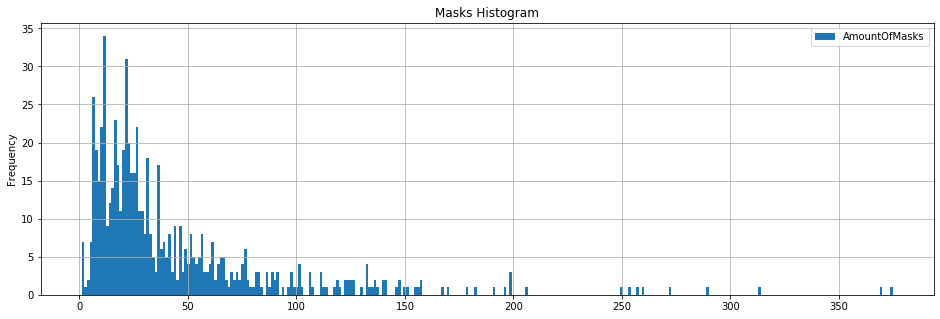

In [42]:
f, ax = plt.subplots(1,1,figsize=(16,5))
r = train_df.plot(kind="hist", bins=300, y = "AmountOfMasks", ax=ax, grid=True, title="Masks Histogram")

In [ ]:
# When calling get_train_data, all masks corresponding to 1 image are grouped into 1 mask
# That mask contains all data(all needed instances)

In [49]:
train_images, train_masks = get_train_data()

Getting and resizing train images and masks ... 
669/670 [============================>.] - ETA: 0s

In [55]:
train_masks = train_masks.reshape(670,256, 256)

## Displaying some test images and their masks

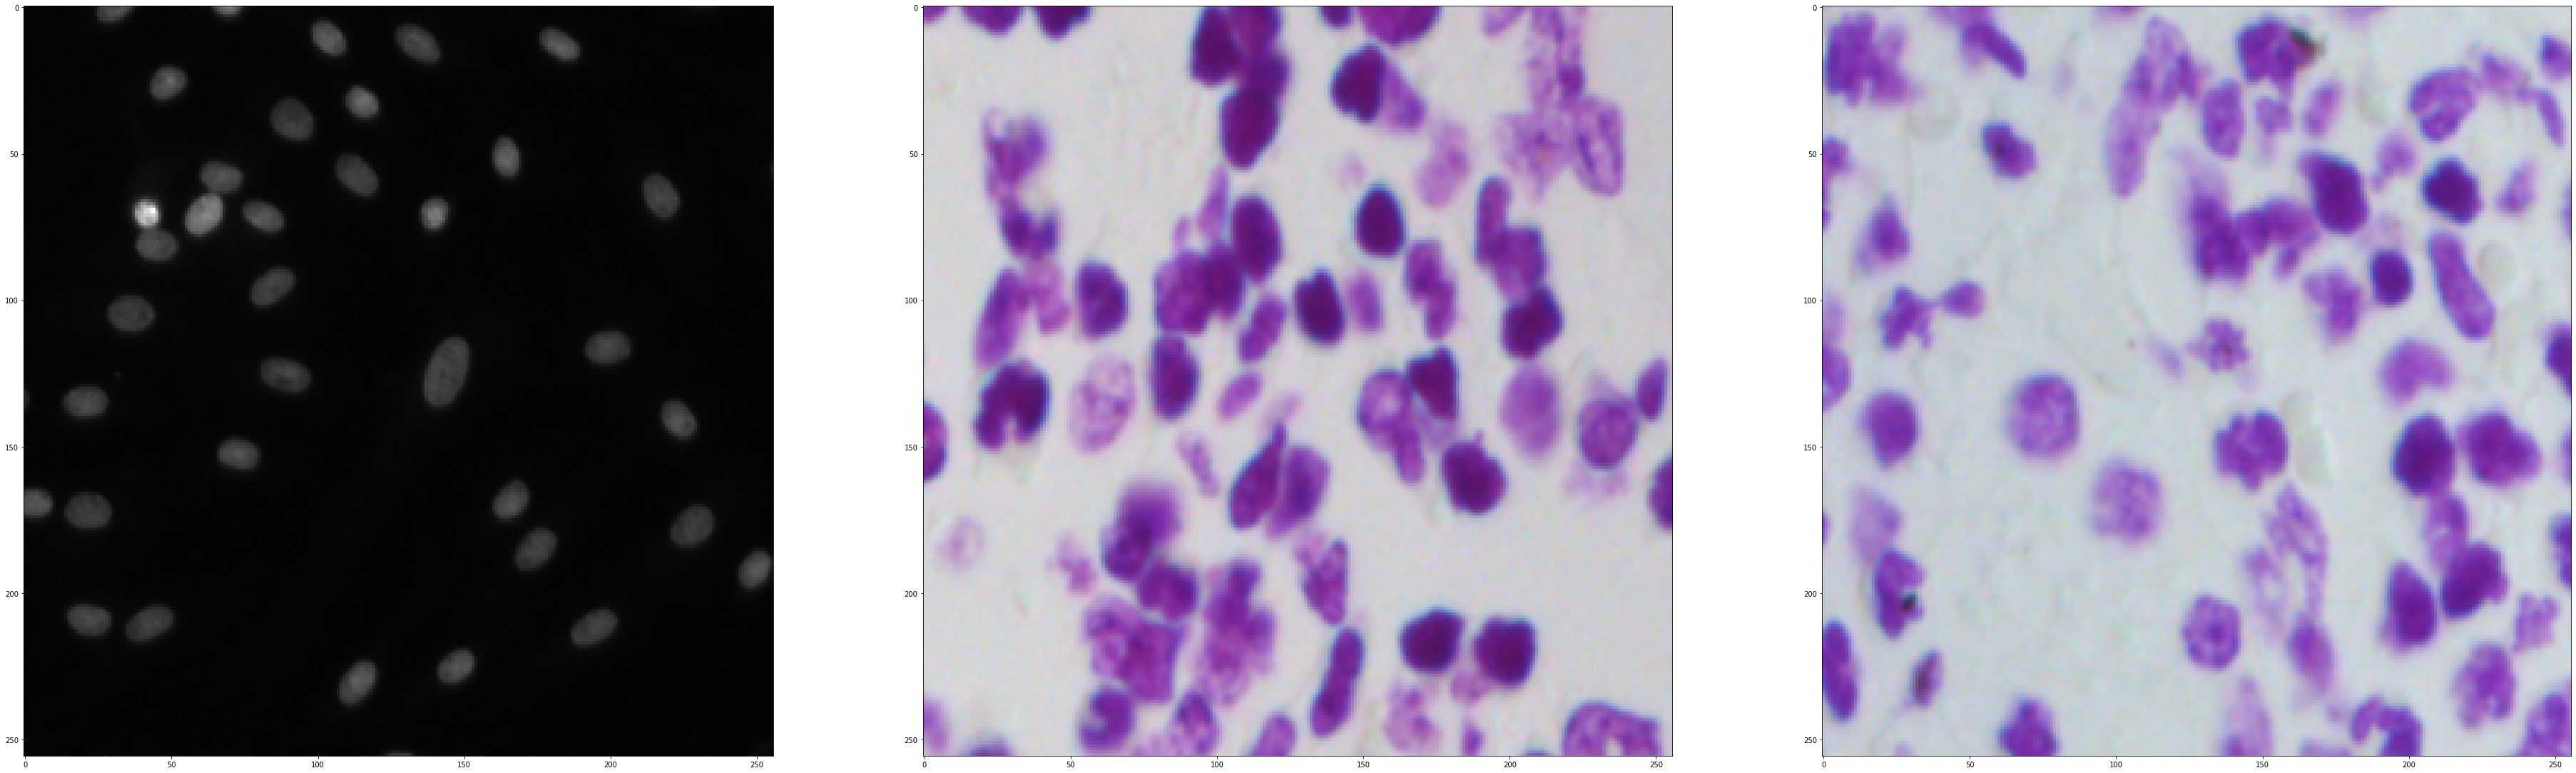

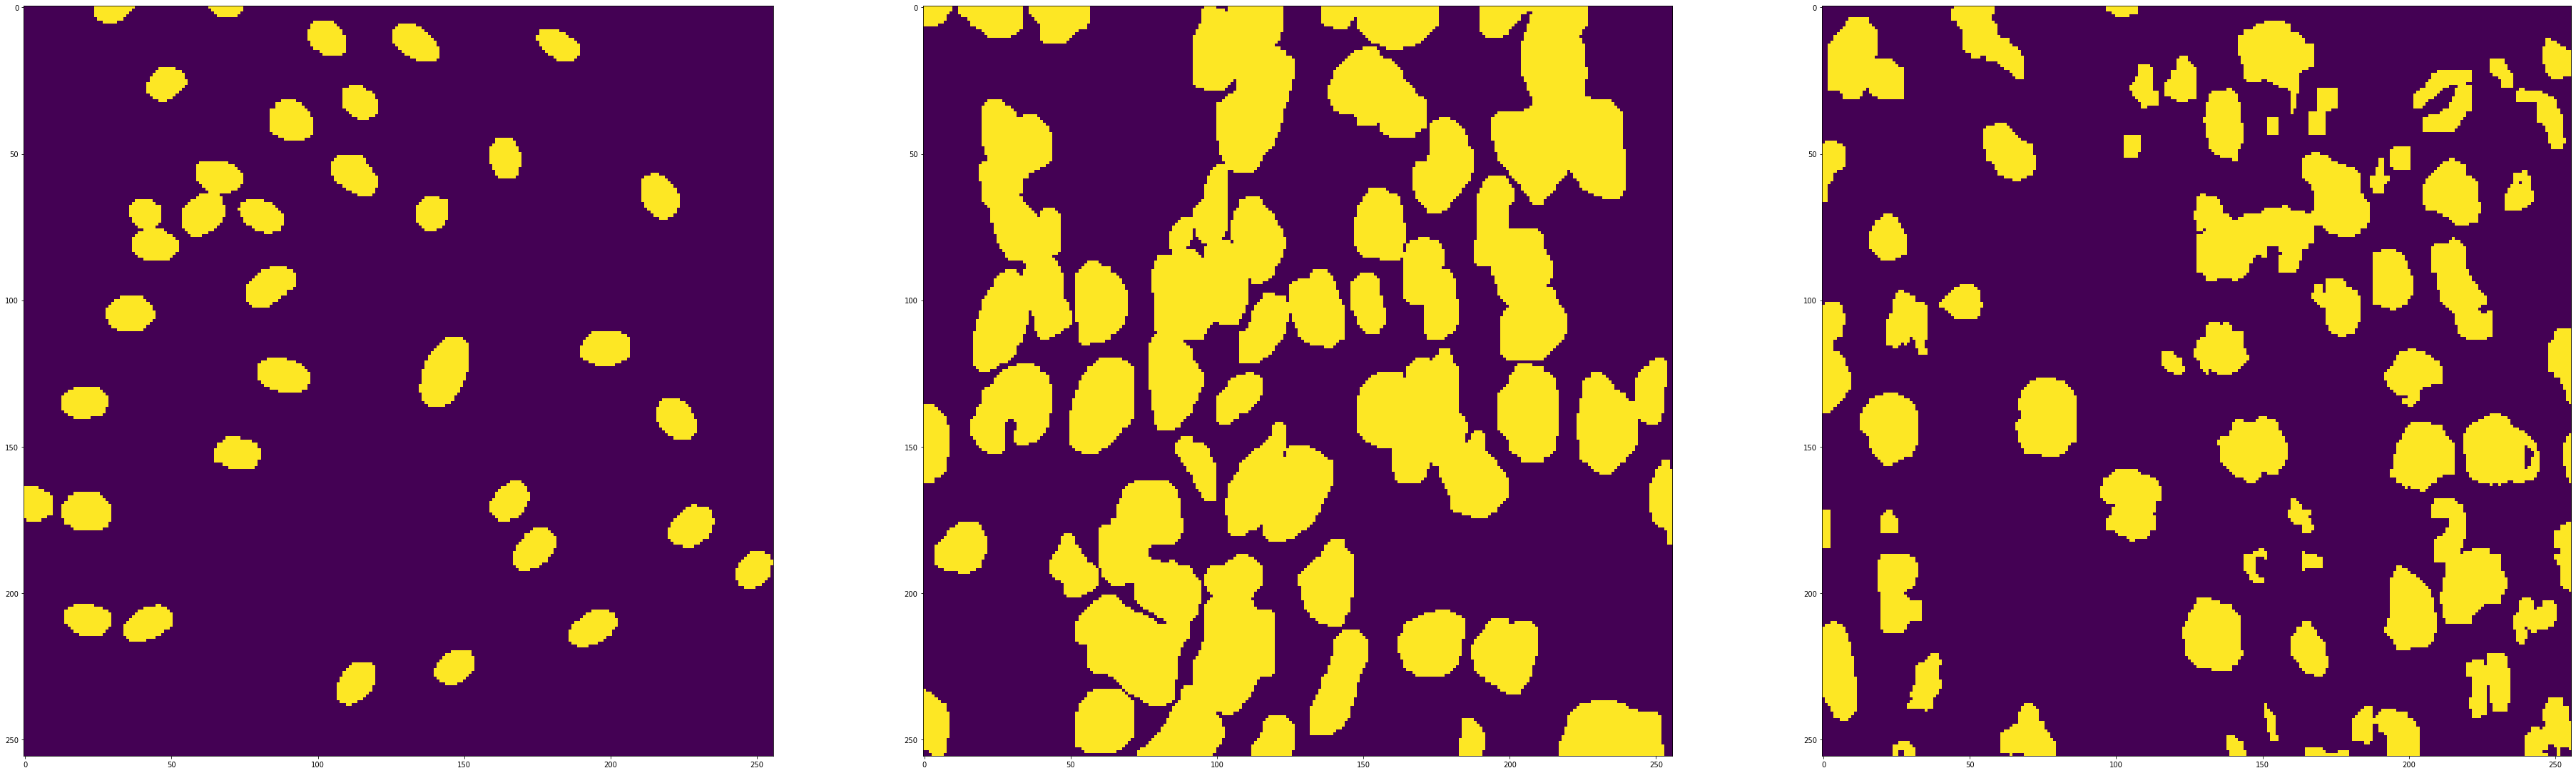

In [68]:
fig=plt.figure(figsize=(64, 64))
columns = 3
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(train_images[i])
plt.show()

fig=plt.figure(figsize=(64, 64))
columns = 3
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(train_masks[i])
plt.show()

In [51]:
test_image = get_test_data()


Getting and resizing test images ... 
64/65 [============================>.] - ETA: 0s

# Displaying some test images

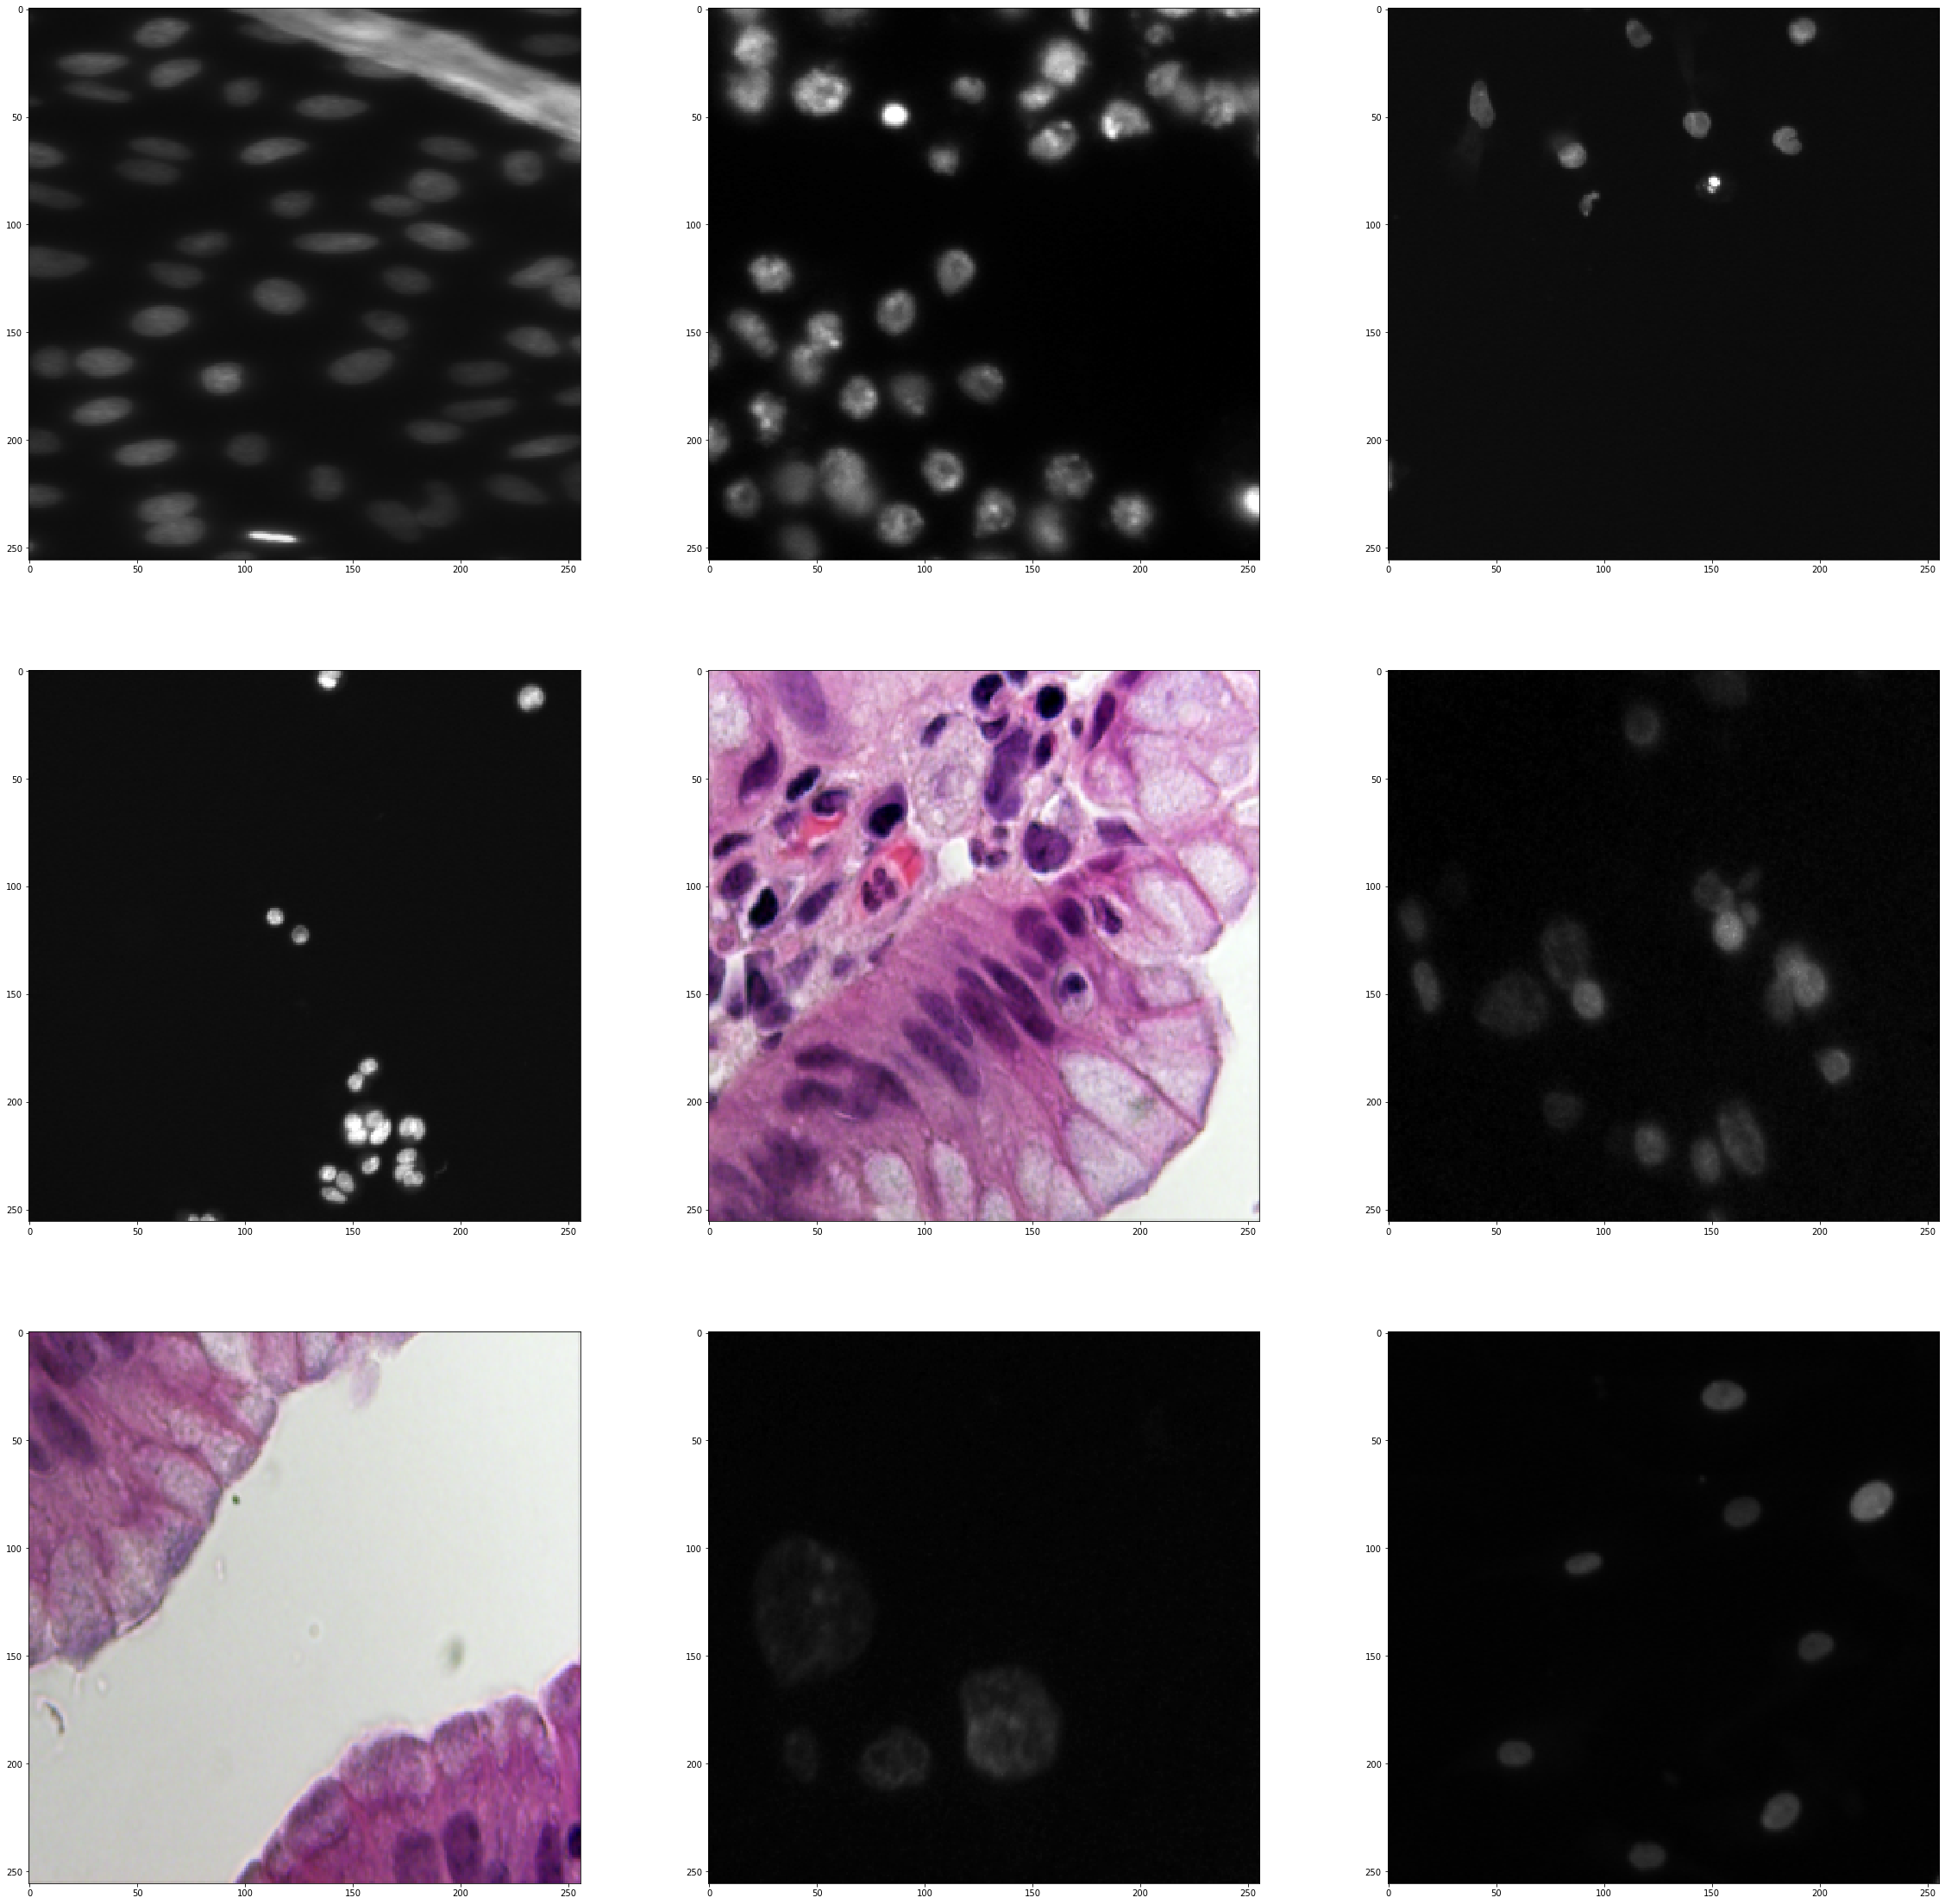

In [76]:
fig=plt.figure(figsize=(40, 40))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(test_image[i])
plt.show()

In [77]:
# As we can see on the image above we have different types of images regarding color map